In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# 0D parameters
cols_0D = [
    '\\q0', '\\q95', '\\ipmhd', '\\kappa', 
    '\\tritop', '\\tribot','\\betap','\\betan',
    '\\li', '\\WTOT_DLM03', '\\ne_inter01',
    '\\TS_NE_CORE_AVG', '\\TS_TE_CORE_AVG'
]

# else diagnostics
cols_diag = [
    '\\ne_inter01', '\\ne_tci01', '\\ne_tci02', '\\ne_tci03', '\\ne_tci04', '\\ne_tci05',
]

# control value / parameter
cols_control = [
    '\\nb11_pnb','\\nb12_pnb','\\nb13_pnb',
    '\\RC01', '\\RC02', '\\RC03',
    '\\VCM01', '\\VCM02', '\\VCM03',
    '\\EC2_PWR', '\\EC3_PWR', 
    '\\ECSEC2TZRTN', '\\ECSEC3TZRTN',
    '\\LV01'
]

# original data
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index(drop = True)

# after some preprocessing 
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index(drop = True)

# information about disruption
df_disruption = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv", encoding='euc-kr').reset_index(drop = True)

# nan interpolation
df = df.interpolate(method = 'linear', limit_direction = 'forward').reset_index(drop = True)

# columns for use
ts_cols = cols_0D + cols_control

In [3]:
print("df_extend, shot num : ", len(df_extend.shot.unique()))
print("df, shot num : ", len(df.shot.unique()))

df_extend, shot num :  686
df, shot num :  969


In [4]:
print("dataset size : ", len(df_extend))

dataset size :  80889


In [5]:
df_extend.head()

,time,shot,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,...,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_NE_CORE_AVG,\TS_NE_EDGE_AVG,\TS_TE_CORE_AVG,\TS_TE_EDGE_AVG
0,1.300000,15150,1.140898,3.330253,632867.112702,1.379301,0.187634,0.187634,0.499783,0.895435,...,0.166292,0.0,0.082853,0.0,0.083381,0.0,2.466017,0.519558,1.920348,0.750526
1,1.326471,15150,1.088281,3.265761,637883.512949,1.374320,0.185840,0.185840,0.487717,0.886558,...,0.170003,0.0,0.074055,0.0,0.055825,0.0,2.570076,0.533822,1.891459,0.509537
2,1.353917,15150,1.026232,3.214854,637675.225973,1.366567,0.183565,0.183565,0.480427,0.881631,...,0.168412,0.0,0.066325,0.0,0.051014,0.0,2.656101,0.545157,1.876689,0.490458
3,1.382333,15150,1.000446,3.190135,638284.585238,1.362993,0.177272,0.183059,0.480461,0.886586,...,0.167944,0.0,0.073554,0.0,0.044079,0.0,2.715845,0.566180,1.891016,0.521561
4,1.411708,15150,0.983380,3.167776,640361.424593,1.360453,0.166735,0.183281,0.478958,0.889211,...,0.153535,0.0,0.103897,0.0,0.036969,0.0,2.760697,0.582714,1.942824,0.482084


In [6]:
df_extend[cols_0D].describe()

,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01,\TS_NE_CORE_AVG,\TS_TE_CORE_AVG
count,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000
mean,1.535290,5.426359,521632.911438,1.693892,0.371494,0.711793,1.222267,1.414556,1.124924,222.721750,9.522795,1.860386,1.877369
std,0.581855,1.416575,92142.762042,0.108782,0.124460,0.164924,0.625747,0.676630,0.194088,117.115015,13.900403,1.429812,0.836787
min,0.646592,2.186578,338923.778039,1.151816,-0.031354,0.074951,0.000084,0.000136,0.629516,0.000000,0.000000,0.000000,0.000000
25%,1.149762,4.632406,474201.239104,1.653583,0.300590,0.674197,0.675144,0.840772,0.981036,137.797017,3.354893,0.479028,1.279823
50%,1.409599,5.149559,495361.895045,1.708614,0.352552,0.745101,1.303773,1.543991,1.066954,214.694265,5.320783,1.968597,1.844258
75%,1.710036,5.815641,557755.137838,1.758409,0.422660,0.831452,1.686594,1.918483,1.268627,285.105893,9.733502,2.886083,2.398498
max,5.444163,10.524553,956874.770683,2.093239,0.855907,0.908549,2.974970,3.197092,1.903289,817.346580,153.864277,9.366962,5.100946


In [7]:
df_extend[cols_control].describe()

,\nb11_pnb,\nb12_pnb,\nb13_pnb,\RC01,\RC02,\RC03,\VCM01,\VCM02,\VCM03,\EC2_PWR,\EC3_PWR,\ECSEC2TZRTN,\ECSEC3TZRTN,\LV01
count,80889.000000,80889.000000,80889.000000,80889.000000,8.088900e+04,8.088900e+04,8.088900e+04,8.088900e+04,8.088900e+04,80889.000000,80889.000000,80889.000000,80889.000000,80889.000000
mean,0.982688,0.723656,0.497083,-514591.306506,4.031622e+05,-5.445032e+05,-1.526931e+05,4.524433e+05,-5.772333e+05,733.727440,74.975202,0.304470,0.243778,-0.307359
std,0.713275,0.717093,0.716535,105841.986743,3.034405e+05,1.131145e+05,1.031574e+06,5.899036e+05,1.190956e+05,18305.068720,180.946701,5.957069,2.899114,0.375188
min,0.000271,-0.025751,-0.002108,-961213.730368,-1.001883e+06,-1.015856e+06,-1.029583e+07,-3.526825e+06,-1.087773e+06,-2685.881458,0.000000,-28.198236,-16.771458,-3.467201
25%,0.000526,0.002571,0.000023,-565955.120346,1.228603e+05,-6.016195e+05,-5.043505e+05,2.147122e+05,-6.359043e+05,0.081233,0.000000,-0.005526,0.000000,-0.464856
50%,1.178372,0.994548,0.000104,-494626.647425,5.290243e+05,-5.235897e+05,0.000000e+00,5.510929e+05,-5.519969e+05,11.951019,0.000000,0.000000,0.000000,-0.213589
75%,1.682534,1.380482,1.128435,-470096.919967,5.735743e+05,-4.980062e+05,0.000000e+00,5.983682e+05,-5.290100e+05,594.536219,8.342342,0.000000,0.000000,-0.077291
max,1.733980,1.876491,2.019481,6535.342906,3.515243e+06,-5.067975e+03,1.061971e+07,1.252200e+07,3.071945e+04,750719.327987,697.590014,43.081256,24.973161,2.589395


In [8]:
# control value
print(cols_control)

['\\nb11_pnb', '\\nb12_pnb', '\\nb13_pnb', '\\RC01', '\\RC02', '\\RC03', '\\VCM01', '\\VCM02', '\\VCM03', '\\EC2_PWR', '\\EC3_PWR', '\\ECSEC2TZRTN', '\\ECSEC3TZRTN', '\\LV01']


shot num : 21747


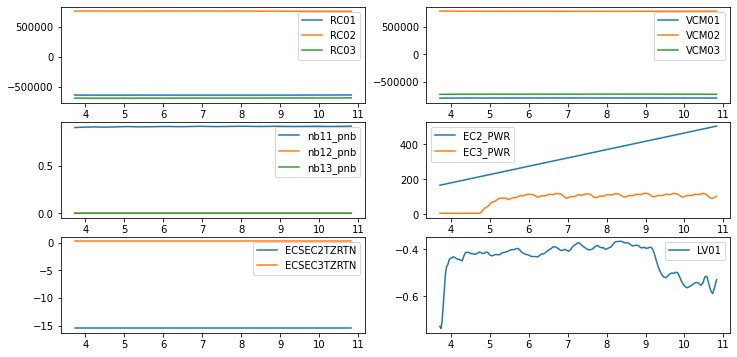

In [9]:
# monitoring arbitrary shot
shot_num = df_extend.shot.unique()[-1]
df_shot = df_extend[df_extend.shot == shot_num]

print("shot num : {}".format(shot_num))

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_shot['time'], df_shot['\\RC01'], label = 'RC01')
axes[0].plot(df_shot['time'], df_shot['\\RC02'], label = 'RC02')
axes[0].plot(df_shot['time'], df_shot['\\RC03'], label = 'RC03')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\VCM01'], label = 'VCM01')
axes[1].plot(df_shot['time'], df_shot['\\VCM02'], label = 'VCM02')
axes[1].plot(df_shot['time'], df_shot['\\VCM03'], label = 'VCM03')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\nb11_pnb'], label = 'nb11_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb12_pnb'], label = 'nb12_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb13_pnb'], label = 'nb13_pnb')
axes[2].legend()

axes[3].plot(df_shot['time'], df_shot['\\EC2_PWR'], label = 'EC2_PWR')
axes[3].plot(df_shot['time'], df_shot['\\EC3_PWR'], label = 'EC3_PWR')
axes[3].legend()

axes[4].plot(df_shot['time'], df_shot['\\ECSEC2TZRTN'], label = 'ECSEC2TZRTN')
axes[4].plot(df_shot['time'], df_shot['\\ECSEC3TZRTN'], label = 'ECSEC3TZRTN')
axes[4].legend()

axes[5].plot(df_shot['time'], df_shot['\\LV01'], label = 'LV01')
axes[5].legend()

In [10]:
cols = df.columns[df.notna().any()].drop(['Unnamed: 0','shot','time']).tolist()

shot num : 21747


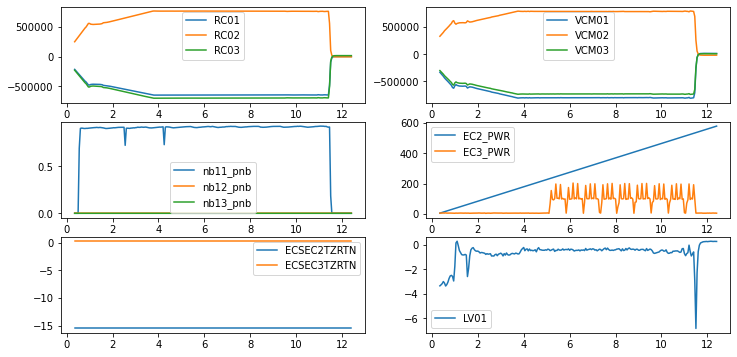

In [11]:
# monitoring arbitrary shot
shot_num = df.shot.unique()[-1]
shot_num = 21747
df_shot = df[df.shot == shot_num]

import matplotlib.pyplot as plt

print("shot num : {}".format(shot_num))

fig, axes = plt.subplots(3,2,figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_shot['time'], df_shot['\\RC01'], label = 'RC01')
axes[0].plot(df_shot['time'], df_shot['\\RC02'], label = 'RC02')
axes[0].plot(df_shot['time'], df_shot['\\RC03'], label = 'RC03')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\VCM01'], label = 'VCM01')
axes[1].plot(df_shot['time'], df_shot['\\VCM02'], label = 'VCM02')
axes[1].plot(df_shot['time'], df_shot['\\VCM03'], label = 'VCM03')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\nb11_pnb'], label = 'nb11_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb12_pnb'], label = 'nb12_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb13_pnb'], label = 'nb13_pnb')
axes[2].legend()

axes[3].plot(df_shot['time'], df_shot['\\EC2_PWR'], label = 'EC2_PWR')
axes[3].plot(df_shot['time'], df_shot['\\EC3_PWR'], label = 'EC3_PWR')
axes[3].legend()

axes[4].plot(df_shot['time'], df_shot['\\ECSEC2TZRTN'], label = 'ECSEC2TZRTN')
axes[4].plot(df_shot['time'], df_shot['\\ECSEC3TZRTN'], label = 'ECSEC3TZRTN')
axes[4].legend()

axes[5].plot(df_shot['time'], df_shot['\\LV01'], label = 'LV01')
axes[5].legend()

shot num : 21310


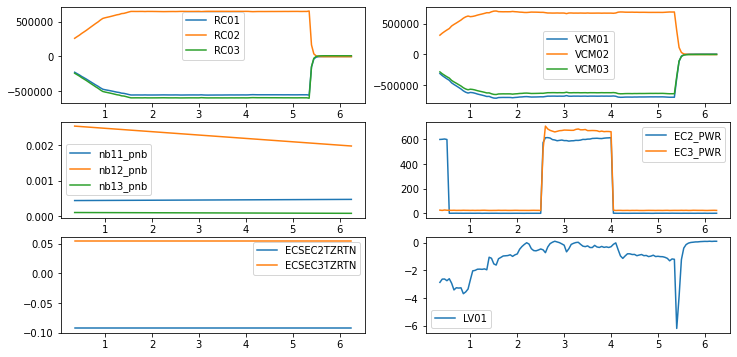

In [12]:
# monitoring arbitrary shot
shot_num = df.shot.unique()[-1]
shot_num = 21310
df_shot = df[df.shot == shot_num]

import matplotlib.pyplot as plt

print("shot num : {}".format(shot_num))

fig, axes = plt.subplots(3,2,figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_shot['time'], df_shot['\\RC01'], label = 'RC01')
axes[0].plot(df_shot['time'], df_shot['\\RC02'], label = 'RC02')
axes[0].plot(df_shot['time'], df_shot['\\RC03'], label = 'RC03')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\VCM01'], label = 'VCM01')
axes[1].plot(df_shot['time'], df_shot['\\VCM02'], label = 'VCM02')
axes[1].plot(df_shot['time'], df_shot['\\VCM03'], label = 'VCM03')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\nb11_pnb'], label = 'nb11_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb12_pnb'], label = 'nb12_pnb')
axes[2].plot(df_shot['time'], df_shot['\\nb13_pnb'], label = 'nb13_pnb')
axes[2].legend()

axes[3].plot(df_shot['time'], df_shot['\\EC2_PWR'], label = 'EC2_PWR')
axes[3].plot(df_shot['time'], df_shot['\\EC3_PWR'], label = 'EC3_PWR')
axes[3].legend()

axes[4].plot(df_shot['time'], df_shot['\\ECSEC2TZRTN'], label = 'ECSEC2TZRTN')
axes[4].plot(df_shot['time'], df_shot['\\ECSEC3TZRTN'], label = 'ECSEC3TZRTN')
axes[4].legend()

axes[5].plot(df_shot['time'], df_shot['\\LV01'], label = 'LV01')
axes[5].legend()

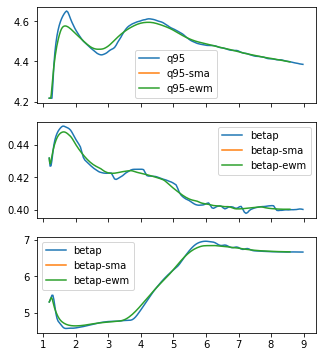

In [13]:
# check the effect of moving average
# SMA : simple moving average
# EWM : exponential moving average
# WMA : Weighted moving average

import numpy as np

def weighted_mean(arr : np.array):
    def inner(x):
        return (arr * x).mean()
    return inner

fig, axes = plt.subplots(3,1,figsize = (5,6), sharex = True)
axes = axes.ravel()

shot_num = df_extend.shot.unique()[-1]
shot_num = 17115
term = 8

df_shot = df_extend[df_extend.shot == shot_num]
df_shot_sma = df_shot.rolling(term).mean().dropna(axis = 0)
df_shot_ewm = df_shot.ewm(term).mean()

axes[0].plot(df_shot['time'], df_shot['\\q95'], label = 'q95')
axes[0].plot(df_shot_sma['time'], df_shot_sma['\\q95'], label = 'q95-sma')
axes[0].plot(df_shot_ewm['time'], df_shot_ewm['\\q95'], label = 'q95-ewm')
axes[0].legend()

axes[1].plot(df_shot['time'], df_shot['\\betap'], label = 'betap')
axes[1].plot(df_shot_sma['time'], df_shot_sma['\\betap'], label = 'betap-sma')
axes[1].plot(df_shot_ewm['time'], df_shot_ewm['\\betap'], label = 'betap-ewm')
axes[1].legend()

axes[2].plot(df_shot['time'], df_shot['\\ne_inter01'], label = 'betap')
axes[2].plot(df_shot_sma['time'], df_shot_sma['\\ne_inter01'], label = 'betap-sma')
axes[2].plot(df_shot_ewm['time'], df_shot_ewm['\\ne_inter01'], label = 'betap-ewm')
axes[2].legend()

In [1]:
import torch
import argparse
import numpy as np
import pandas as pd
from src.config import Config
from src.nn_env.utility import preparing_0D_dataset, get_range_of_output
from src.nn_env.dataset import DatasetFor0D
from src.nn_env.transformer import Transformer
from src.nn_env.train import train
from src.nn_env.loss import CustomLoss
from src.nn_env.evaluate import evaluate
from src.nn_env.predict import generate_shot_data_from_real, generate_shot_data_from_self
from torch.utils.data import DataLoader

config = Config()

df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()
df_disruption = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv", encoding='euc-kr').reset_index()

# nan interpolation
df.interpolate(method = 'linear', limit_direction = 'forward')

# columns for use
# 0D parameter
cols_0D = config.DEFAULT_COLS_0D

# control value / parameter
cols_control = config.DEFAULT_COLS_CTRL

ts_train, ts_valid, ts_test, scaler_0D, scaler_ctrl = preparing_0D_dataset(df, df_disruption, cols_0D, cols_control, 'Robust')

seq_len = 40
pred_len = 40
interval = 4
batch_size = 1
pred_cols = cols_0D
    
train_data = DatasetFor0D(ts_train.copy(deep = True), df_disruption, seq_len, seq_len + pred_len, pred_len, cols_0D, cols_control, interval, scaler_0D, scaler_ctrl)
valid_data = DatasetFor0D(ts_valid.copy(deep = True), df_disruption, seq_len, seq_len + pred_len, pred_len, cols_0D, cols_control, interval, scaler_0D, scaler_ctrl)
test_data = DatasetFor0D(ts_test.copy(deep = True), df_disruption, seq_len, seq_len + pred_len, pred_len, cols_0D, cols_control, interval, scaler_0D, scaler_ctrl)
    
train_loader = DataLoader(train_data, batch_size = batch_size, num_workers = 4, shuffle = True, pin_memory = True)
valid_loader = DataLoader(valid_data, batch_size = batch_size, num_workers = 4, shuffle = True, pin_memory = True)
test_loader = DataLoader(test_data, batch_size = batch_size, num_workers = 4, shuffle = True, pin_memory = True)
    
# data range
range_info = get_range_of_output(train_data.ts_data, cols_0D)

# transformer model argument
model = Transformer(
    n_layers = config.TRANSFORMER_CONF['n_layers'], 
    n_heads = config.TRANSFORMER_CONF['n_heads'], 
    dim_feedforward = config.TRANSFORMER_CONF['dim_feedforward'], 
    dropout = config.TRANSFORMER_CONF['dropout'],        
    RIN = config.TRANSFORMER_CONF['RIN'],
    input_0D_dim = len(cols_0D),
    input_0D_seq_len = seq_len,
    input_ctrl_dim = len(cols_control),
    input_ctrl_seq_len = seq_len + pred_len,
    output_0D_pred_len = pred_len,
    output_0D_dim = len(cols_0D),
    feature_0D_dim = config.TRANSFORMER_CONF['feature_0D_dim'],
    feature_ctrl_dim = config.TRANSFORMER_CONF['feature_ctrl_dim'],
    range_info = range_info,
    noise_mean = config.TRANSFORMER_CONF['noise_mean'],
    noise_std = config.TRANSFORMER_CONF['noise_std']
)

device = 'cpu'
model.to(device)
model.eval()

import os

save_best_dir = os.path.join('./weights/', "{}_seq{}_dis{}_best.pt".format('Transformer', seq_len, pred_len))

replace nan value: 100%|██████████| 438/438 [00:01<00:00, 316.71it/s]
/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
replace nan value: 100%|██████████| 110/110 [00:00<00:00, 320.07it/s]
/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
/home/zinzinbin/anaconda3/envs/research-env/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(
replace nan value: 100%|██████████| 138/138 [00:00<00:00, 315.28it/s]
/home/zinzinbi

In [52]:
model.load_state_dict(torch.load(save_best_dir, map_location=torch.device('cpu')))

sample_data_0D, sample_data_ctrl, sample_target_0D = next(iter(train_loader))
output = model(sample_data_0D.to(device), sample_data_ctrl.to(device)).detach().cpu().numpy()

In [54]:
loss_fn = torch.nn.MSELoss(reduction = 'mean')
loss_fn(sample_target_0D, model(sample_data_0D.to(device), sample_data_ctrl.to(device)))

tensor(0.0101, grad_fn=<MseLossBackward0>)

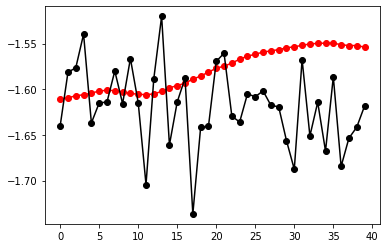

In [55]:
import matplotlib.pyplot as plt

target_q = sample_target_0D[:,:,0].numpy().reshape(-1,)
pred_q = output[:,:,0].reshape(-1,)

plt.plot(target_q, 'ro-', label = 'target')
plt.plot(pred_q, 'ko-', label = 'pred')
plt.show()

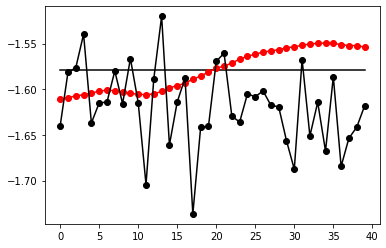

In [56]:
sample_target_0D_mean = sample_target_0D.mean(axis = 1).repeat(1,sample_target_0D.size()[1],1)
sample_target_0D_res = sample_target_0D - sample_target_0D_mean

target_q_mean = sample_target_0D_mean[:,:,0].numpy().reshape(-1,)
target_q_res = sample_target_0D_res[:,:,0].numpy().reshape(-1,)

plt.plot(target_q_mean, 'k-', label = 'target-mean')
plt.plot(target_q, 'ro-', label = 'target')
plt.plot(pred_q, 'ko-', label = 'pred')
plt.show()

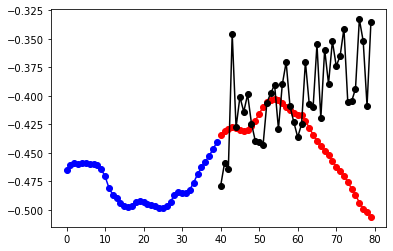

In [57]:
idx = 3
sample_q = sample_data_0D[:,:,idx].numpy().reshape(-1, )
target_q = sample_target_0D[:,:,idx].numpy().reshape(-1,)
pred_q = output[:,:,idx].reshape(-1,)

plt.plot([i for i in range(0,40)], sample_q, 'bo-', label = 'input')
plt.plot([i for i in range(40,80)], target_q, 'ro-', label = 'target')
plt.plot([i for i in range(40,80)], pred_q, 'ko-', label = 'pred')
plt.show()

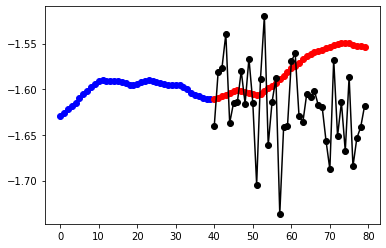

In [58]:
idx = 0
sample_q = sample_data_0D[:,:,idx].numpy().reshape(-1, )
target_q = sample_target_0D[:,:,idx].numpy().reshape(-1,)
pred_q = output[:,:,idx].reshape(-1,)

plt.plot([i for i in range(0,40)], sample_q, 'bo-', label = 'input')
plt.plot([i for i in range(40,80)], target_q, 'ro-', label = 'target')
plt.plot([i for i in range(40,80)], pred_q, 'ko-', label = 'pred')
plt.show()

In [36]:
train_data.__len__()

1393

In [30]:
df_shot.head()

,index,time,shot,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,...,\TS_EDGE10:EDGE10_NE,\TS_EDGE11:EDGE11_NE,\TS_EDGE12:EDGE12_NE,\TS_EDGE13:EDGE13_NE,\TS_EDGE14:EDGE14_NE,\TS_EDGE15:EDGE15_NE,\TS_NE_CORE_AVG,\TS_NE_EDGE_AVG,\TS_TE_CORE_AVG,\TS_TE_EDGE_AVG
68210,68210,1.500000,21310,1.011834,3.500824,565800.4375,1.418212,0.222899,0.222899,0.254580,...,0.023965,0.101787,0.0,0.0,0.0,0.0,1.969555,0.362001,1.569557,0.920374
68211,68211,1.526471,21310,0.991205,3.467716,569972.2500,1.413994,0.224061,0.224061,0.249449,...,0.025292,0.113222,0.0,0.0,0.0,0.0,1.990446,0.371892,1.662812,0.923783
68212,68212,1.553917,21310,0.958859,3.438906,570964.5625,1.409431,0.223519,0.223519,0.242476,...,0.038199,0.111834,0.0,0.0,0.0,0.0,2.002690,0.381913,1.715359,0.879980
68213,68213,1.582333,21310,0.938885,3.435241,571373.3750,1.409301,0.223436,0.223436,0.239146,...,0.045555,0.098896,0.0,0.0,0.0,0.0,2.008980,0.386894,1.719531,0.866149
68214,68214,1.611708,21310,0.927227,3.443794,571631.9375,1.411529,0.223472,0.225941,0.237918,...,0.040010,0.078304,0.0,0.0,0.0,0.0,2.003424,0.382886,1.648802,0.879133


In [3]:
print("shot number : {}".format(len(np.unique(df.shot))))

shot number : 969


In [9]:
# Scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df[cols_0D] = scaler.fit_transform(df[cols_0D])

In [14]:
df[cols_0D].head()

,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
0,-1.520824,2.278280,4.193905,-4.531642,-2.154318,-2.670414,-2.160409,-1.911145,43.495593,-0.949021,-0.731907
1,-1.520824,2.405547,3.917030,-4.243792,-2.290189,-2.577223,-1.735406,-1.648650,35.447995,-0.927358,-0.708762
2,-1.520824,2.532814,3.640155,-3.955944,-2.426059,-2.484032,-1.310403,-1.386154,27.400403,-0.904047,-0.671346
3,-1.520824,2.660080,3.363280,-3.668094,-2.561930,-2.390842,-0.885400,-1.123659,19.352810,-0.869313,-0.594547
4,-1.520824,2.787347,3.086405,-3.380246,-2.697801,-2.297651,-0.460396,-0.861163,11.305217,-0.832426,-0.568875


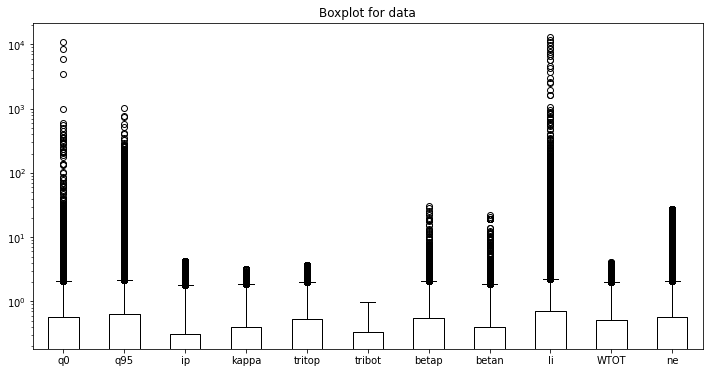

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

params_name = [
    'q0', 'q95', 'ip', 'kappa', 
    'tritop', 'tribot','betap','betan',
    'li', 'WTOT', 'ne',
]

fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

In [26]:
df[cols_0D].isna().sum()

\q0               0
\q95              0
\ipmhd            0
\kappa            0
\tritop           0
\tribot           0
\betap            0
\betan            0
\li               0
\WTOT_DLM03    5205
\ne_inter01    5447
dtype: int64

In [33]:
df[cols_0D[0:5]].describe()

,\q0,\q95,\ipmhd,\kappa,\tritop
count,162209.000000,162209.000000,162209.000000,162209.000000,162209.000000
mean,0.390426,0.532159,-0.129879,-0.298770,0.107503
std,38.503146,6.923714,1.078720,1.101322,1.052909
min,-1.520824,-2.529514,-5.235525,-6.436685,-5.949606
25%,-0.430636,-0.364525,-0.687693,-0.604792,-0.470654
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.569364,0.635475,0.312307,0.395208,0.529346
max,10880.989172,1034.240911,4.264548,3.248166,3.739080


In [34]:
df[cols_0D[5:]].describe()

,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
count,162209.000000,162209.000000,162209.000000,162209.000000,157004.000000,156762.000000
mean,-0.335211,-0.021544,-0.137179,1.222604,-0.009388,0.221051
std,0.903199,7.857593,5.859874,77.741568,0.935068,2.931398
min,-5.349860,-1629.885537,-1405.730464,-3.095300,-5.965122,-26.960409
25%,-0.661292,-0.443196,-0.605664,-0.300305,-0.480075,-0.420000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.338708,0.556804,0.394336,0.699695,0.519925,0.580000
max,0.977083,30.062150,21.777914,12811.545906,4.182544,27.352145


In [44]:
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index()
shot_list = np.unique(df.shot)
df_shot = df[df.shot == shot_list[-1]]

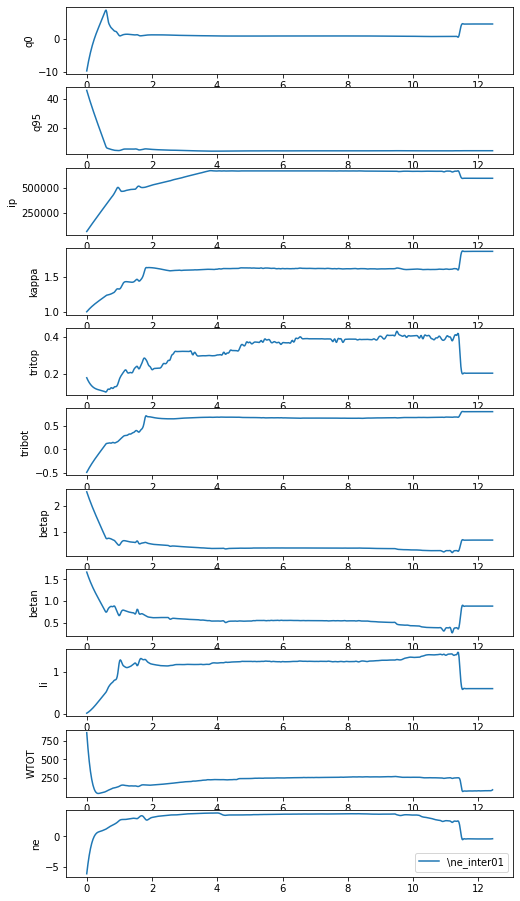

In [52]:
t_x = df_shot.time

fig, ax = plt.subplots(len(cols_0D),1, figsize = (8, 16))

for i, col in enumerate(cols_0D):
    if col == '\\ipmhd':
        ax[i].plot(t_x, df_shot[col], label = col)
    else:
        ax[i].plot(t_x, df_shot[col], label = col)
    ax[i].set_ylabel(params_name[i])
    
plt.legend()

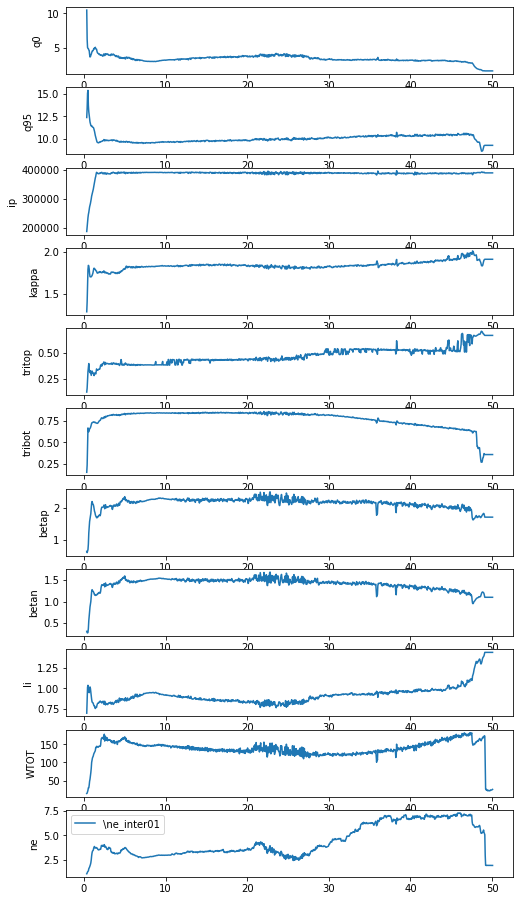

In [54]:
df_shot = df[df.shot == shot_list[-16]]
t_x = df_shot.time

fig, ax = plt.subplots(len(cols_0D),1, figsize = (8, 16))

for i, col in enumerate(cols_0D):
    if col == '\\ipmhd':
        ax[i].plot(t_x, df_shot[col].abs(), label = col)
    else:
        ax[i].plot(t_x, df_shot[col], label = col)
    ax[i].set_ylabel(params_name[i])
    
plt.legend()

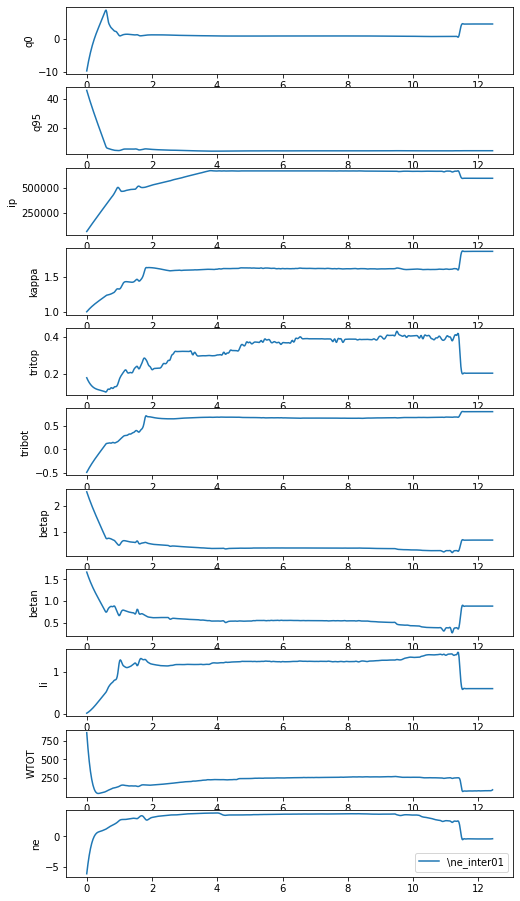

In [55]:
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()
shot_list = np.unique(df_extend.shot)
df_shot = df_extend[df_extend.shot == shot_list[-1]]

t_x = df_shot.time

fig, ax = plt.subplots(len(cols_0D),1, figsize = (8, 16))

for i, col in enumerate(cols_0D):
    if col == '\\ipmhd':
        ax[i].plot(t_x, df_shot[col].abs(), label = col)
    else:
        ax[i].plot(t_x, df_shot[col], label = col)
    ax[i].set_ylabel(params_name[i])
    
plt.legend()

<AxesSubplot:xlabel='\\ne_tci01', ylabel='Probability'>

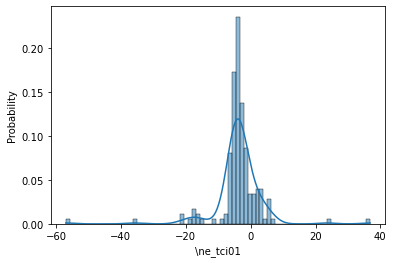

In [61]:
import seaborn as sns
shot_num = 21747
shot_data = df[df.shot == shot_num]
tftsrt = df_disruption[df_disruption.shot == shot_num].tftsrt.values.item()
sns.histplot(data = shot_data[shot_data['time'] > tftsrt], x = '\\ne_tci01', kde = True, stat = 'probability', discrete = False, common_norm = False)

/tmp/ipykernel_1966344/713098904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_data['state'] = ['Ramp-up' if x < tftsrt else 'Flat-top' for x in shot_data['time'] ]


(2.0, 8.0)

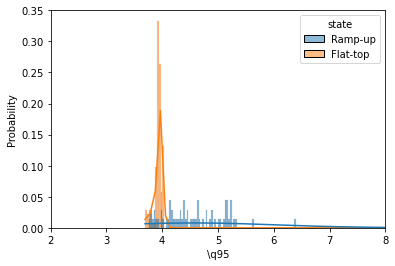

In [67]:
import matplotlib.pyplot as plt

shot_data['state'] = ['Ramp-up' if x < tftsrt else 'Flat-top' for x in shot_data['time'] ]

sns.histplot(data = shot_data, hue = 'state', x = '\\q95', kde = True, stat = 'probability', discrete = False, common_norm = False)
plt.xlim([2,8])

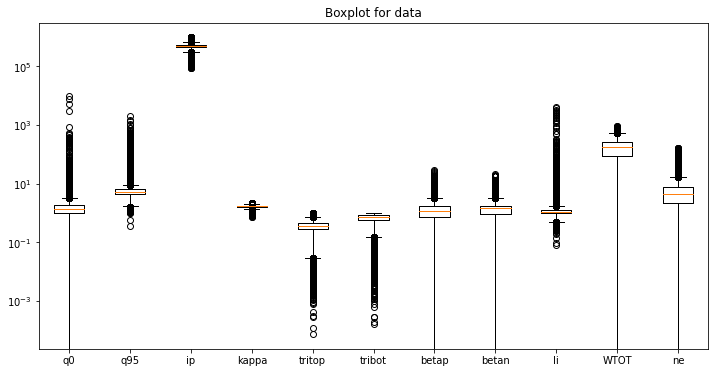

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

params_name = [
    'q0', 'q95', 'ip', 'kappa', 
    'tritop', 'tribot','betap','betan',
    'li', 'WTOT', 'ne',
]
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index()
df['\\ipmhd'] = df['\\ipmhd'].abs().values
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

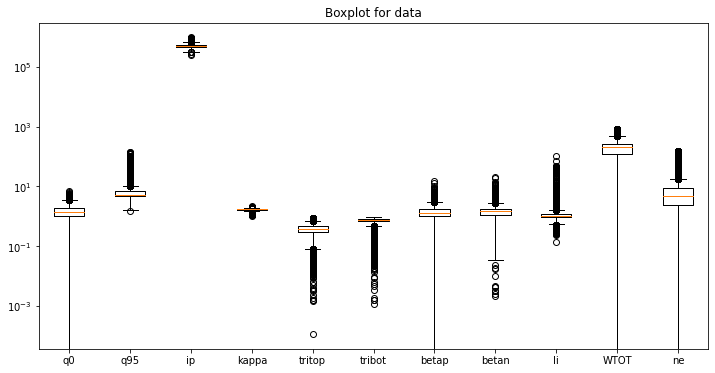

In [81]:
df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    df_shot = df[df.shot == shot]
    df_flat = pd.concat([df_flat, df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

In [82]:
df_flat[cols_0D].describe()

,\q0,\q95,\ipmhd,\kappa,\tritop,\tribot,\betap,\betan,\li,\WTOT_DLM03,\ne_inter01
count,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,99302.000000,95756.000000,95285.000000
mean,1.492579,6.042518,500373.285083,1.709533,0.406672,0.710587,1.345457,1.413759,1.139589,185.698614,5.764073
std,1.006717,2.751079,91072.418542,0.117467,0.150611,0.180283,0.676929,0.667586,0.781086,174.426524,17.323039
min,0.000000,1.491009,255735.453125,1.062984,-0.182462,-0.479648,-37.375633,-29.187229,0.135620,-884.889832,-137.191071
25%,0.993714,4.832880,461580.007812,1.670747,0.311431,0.689001,1.024508,1.098246,0.959017,120.525467,2.387565
50%,1.397730,5.377840,488489.375000,1.726157,0.377787,0.754345,1.317742,1.498250,1.035986,202.045837,4.849455
75%,1.964353,6.957626,552431.343750,1.779314,0.465998,0.832772,1.819306,1.812554,1.245384,270.777557,8.568748
max,6.934634,143.498032,966119.687500,2.172460,0.914578,0.943144,15.789760,20.521006,107.635742,867.520996,153.018738


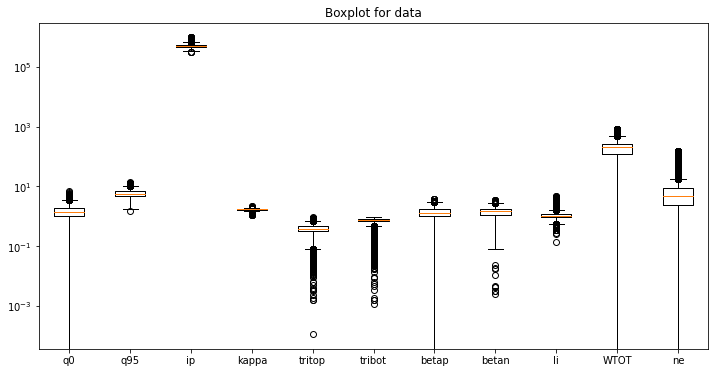

In [83]:
df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    df_shot = df[df.shot == shot]
    df_shot = df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]
    
    for col in cols_0D:
        q1 = df_shot[col].quantile(0.25)
        q3 = df_shot[col].quantile(0.75)
        
        IQR = q3 - q1
        whisker_width = 1.5      
        
        lower_whisker = q1 - whisker_width * IQR
        upper_whisker = q3 + whisker_width * IQR
        
        df_shot.loc[:,col] = np.where(df_shot[col]>upper_whisker, upper_whisker, np.where(df_shot[col]<lower_whisker,lower_whisker, df_shot[col]))

    df_flat = pd.concat([df_flat, df_shot])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()        

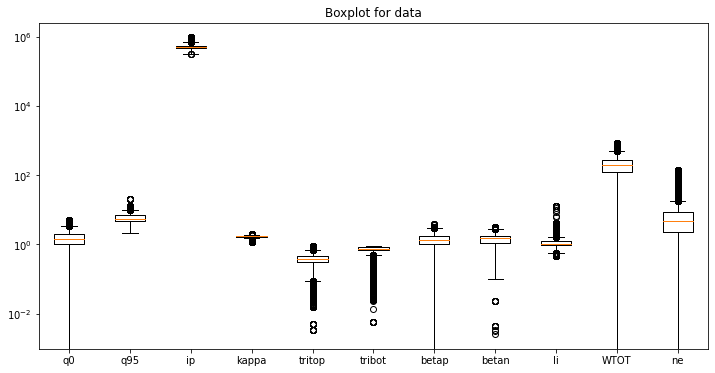

In [97]:
from scipy.stats.mstats import winsorize

df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    
    if tipminf < tftsrt:
        continue
    
    df_shot = df[df.shot == shot]
    df_shot = df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]
    
    if len(df_shot) == 0:
        continue
    
    for col in cols_0D:
        df_shot[col] = winsorize(df_shot[col].values, limits = [0.1, 0.1]).data

    df_flat = pd.concat([df_flat, df_shot])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()        

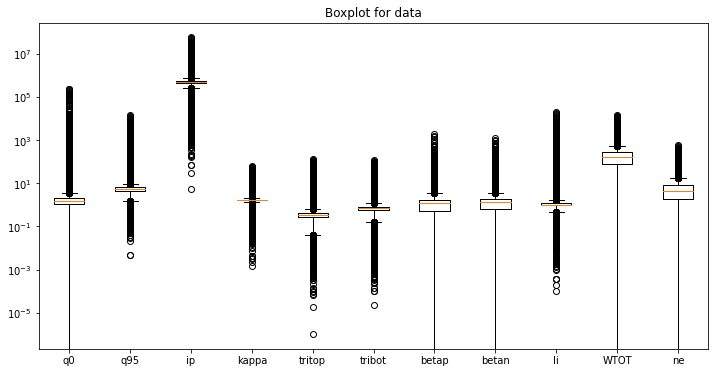

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

params_name = [
    'q0', 'q95', 'ip', 'kappa', 
    'tritop', 'tribot','betap','betan',
    'li', 'WTOT', 'ne',
]
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index()
df['\\ipmhd'] = df['\\ipmhd'].abs().values
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

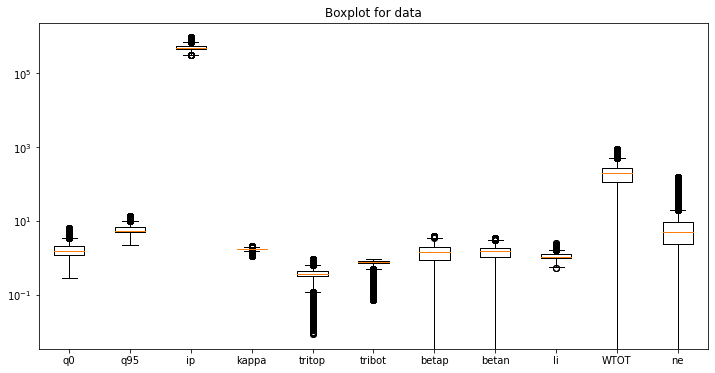

In [79]:
df_flat = pd.DataFrame({})

for shot in np.unique(df.shot.values):
    
    if shot not in np.unique(df_disruption.shot.values):
        continue
    tftsrt = df_disruption[df_disruption.shot == shot].tftsrt.values.item() * 1.5
    tipminf = df_disruption[df_disruption.shot == shot].tipminf.values.item() * 0.95
    df_shot = df[df.shot == shot]
    df_flat = pd.concat([df_flat, df_shot[(df_shot.time > tftsrt) & (df_shot.time < tipminf)]])
    
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_flat[col].dropna(axis = 0))
ax.boxplot(s)

plt.title('Boxplot for data')
plt.xticks([i + 1for i in range(len(cols_0D))], params_name)
plt.yscale('log', base = 10)
plt.show()

<AxesSubplot:>

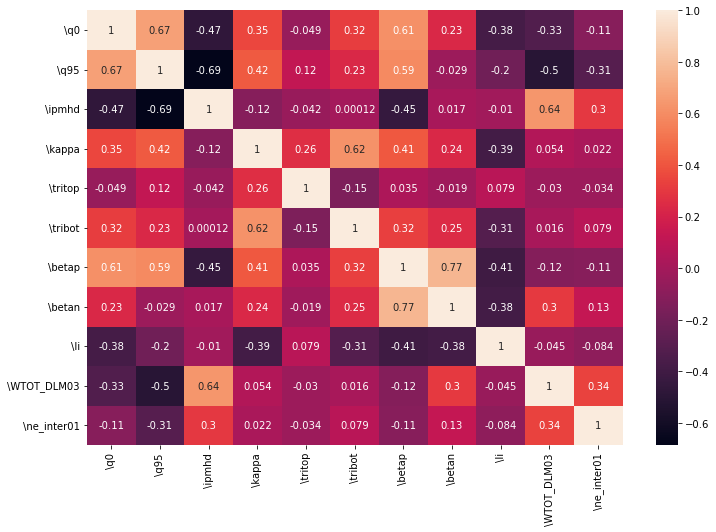

In [103]:
plt.figure(figsize = (12,8))
sns.heatmap(df_flat[cols_0D].corr(), annot = True)

In [107]:
from statsmodels.tsa.stattools import adfuller

shot = 21747
df_shot = df_flat[df_flat.shot == shot]
result = adfuller(df_shot[cols_0D[0]], autolag='AIC')

print('Test statistic: ' , result[0])
print('p-value: '  ,result[1])
print('Critical Values:' ,result[4])

Test statistic:  0.6621669653923566
p-value:  0.9890518015332157
Critical Values: {'1%': -3.4948504603223145, '5%': -2.889758398668639, '10%': -2.5818220155325444}


In [108]:
for col in cols_0D:
    result = adfuller(df_shot[col], autolag='AIC')
    print('col : {}, p-value: {}'.format(col, result[1]))

col : \q0, p-value: 0.9890518015332157
col : \q95, p-value: 0.2471782778424073
col : \ipmhd, p-value: 0.9520207332750216
col : \kappa, p-value: 0.302143537688415
col : \tritop, p-value: 0.23285530737387528
col : \tribot, p-value: 0.8743377900869398
col : \betap, p-value: 0.9960498315688024
col : \betan, p-value: 0.9948466426667564
col : \li, p-value: 0.9952516079265417
col : \WTOT_DLM03, p-value: 0.6825520725286149
col : \ne_inter01, p-value: 0.9990660214744999


In [ ]:
cols = cols_0D
cols = ['shot'] + cols

dict_data = {}

for col in cols:
    dict_data[col] = []

for shot in np.unique(df_flat.shot.values):
    df_shot = df_flat[df_flat.shot == shot]
    
    for col in cols_0D:
        result = adfuller(df_shot[col], autolag='AIC')
        dict_data[col].append(result[1])
        
    print('col : {}, p-value: {}'.format(col, result[1]))

### Maximum mean discrepancy
- First, we checked the data distribution shift using MMD
- Second, we checked the regime where the data distribution shift occurs

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from src.config import Config

config = Config()

cols_0D = config.DEFAULT_COLS_0D
cols_control = config.DEFAULT_COLS_CTRL

# original data
df = pd.read_csv("./dataset/KSTAR_Disruption_ts_data.csv").reset_index(drop = True)

# after some preprocessing 
df_extend = pd.read_csv("./dataset/KSTAR_Disruption_ts_data_extend.csv").reset_index(drop = True)

# information about disruption
df_disruption = pd.read_csv("./dataset/KSTAR_Disruption_Shot_List.csv", encoding='euc-kr').reset_index(drop = True)

# nan interpolation
df = df.interpolate(method = 'linear', limit_direction = 'forward').reset_index(drop = True)

# columns for use
ts_cols = cols_0D + cols_control

experiment : 21747
t-min : 3.724
t-max : 10.824


<ipython-input-2-4b8c032f8c1c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shot[cols_0D] = scaler.fit_transform(df_shot[cols_0D].values)


mmd for source and target : 1.938


(-2.0, 2.0)

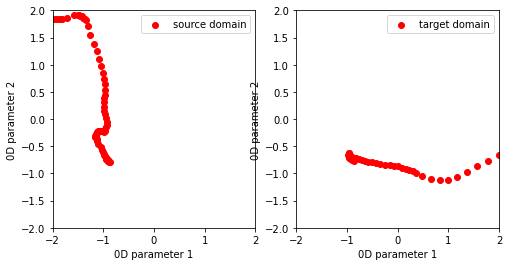

In [2]:
# load arbitrary experimental data
shot_num = 21747
df_shot = df_extend[df_extend.shot == shot_num]

# shot info
print("experiment : {}".format(shot_num))
print("t-min : {:.3f}".format(df_shot.time.min()))
print("t-max : {:.3f}".format(df_shot.time.max()))

import numpy as np
from typing import Literal
from sklearn.preprocessing import StandardScaler

# scaling
scaler = StandardScaler()
df_shot[cols_0D] = scaler.fit_transform(df_shot[cols_0D].values)

# dimension reduction
from sklearn.decomposition import PCA
total = PCA(n_components=2).fit_transform(df_shot[cols_0D].values)

idx_m = len(total) // 2
source = total[:idx_m]
target = total[idx_m:-1]

def MMD(x : np.ndarray, y : np.ndarray, kernel:Literal['multiscale', 'rbf'] = 'rbf'):
    xx = np.matmul(x, x.T)
    yy = np.matmul(y, y.T)
    zz = np.matmul(x, y.T)
    
    rx = np.diag(xx.diagonal())
    ry = np.diag(yy.diagonal())
    
    dxx = rx.T + rx - 2 * xx
    dyy = ry.T + ry - 2 * yy
    dxy = rx.T + ry - 2 * zz
    
    XX = np.zeros_like(xx)
    YY = np.zeros_like(yy)
    ZZ = np.zeros_like(zz)
    
    if kernel == 'multiscale':
        bandwidth = [0.2, 0.5, 0.9, 1.3]
        
        for bw in bandwidth:
            XX += bw ** 2 * (bw ** 2 + dxx) ** -1
            YY += bw ** 2 * (bw ** 2 + dyy) ** -1
            ZZ += bw ** 2 * (bw ** 2 + dxy) ** -1
    
    if kernel == 'rbf':
        bandwidth = [10, 15, 20, 50]
        
        for bw in bandwidth:
            XX += np.exp(-0.5 * dxx / bw)
            YY += np.exp(-0.5 * dyy / bw)
            ZZ += np.exp(-0.5 * dxy / bw)
    
    return np.mean(XX + YY - 2.0 * ZZ)

mmd = MMD(source, target, 'rbf')

print("mmd for source and target : {:.3f}".format(mmd))

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize = (8,4))
delta = 0.025

axes = axes.ravel()
axes[0].set_xlabel("0D parameter 1")
axes[0].set_ylabel("0D parameter 2")
axes[0].scatter(source[:,0], source[:,1], label = 'source domain', marker = 'o', facecolor = 'r')
axes[0].legend()
axes[0].set_xlim([-2.0, 2.0])
axes[0].set_ylim([-2.0, 2.0])

axes[1].set_xlabel("0D parameter 1")
axes[1].set_ylabel("0D parameter 2")
axes[1].scatter(target[:,0], target[:,1], label = 'target domain', marker = 'o', facecolor = 'r')
axes[1].legend()
axes[1].set_xlim([-2.0, 2.0])
axes[1].set_ylim([-2.0, 2.0])

param : q95, min : 2.187, max : 10.525, std : 1.417
param : betap, min : 0.000, max : 2.975, std : 0.626
param : betan, min : 0.000, max : 3.197, std : 0.677
param : li, min : 0.630, max : 1.903, std : 0.194
param : q0, min : 0.647, max : 5.444, std : 0.582


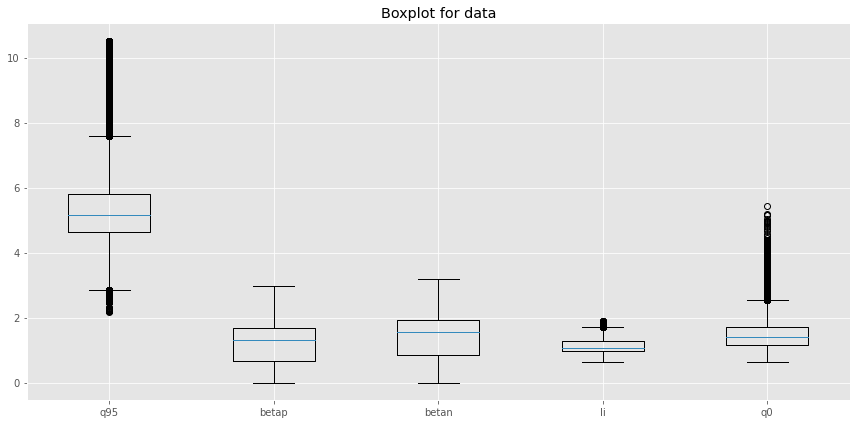

In [3]:
# target value distribution
import matplotlib.pyplot as plt
import seaborn as sns

params_name = ['q95', 'betap','betan','li', 'q0']

plt.style.use(['ggplot'])
fig,ax = plt.subplots(figsize = (12,6))
s = []

for col in cols_0D:
    s.append(df_extend[col].dropna(axis = 0))
    
ax.boxplot(s)

ax.set_title('Boxplot for data')
ax.set_xticks([i + 1 for i in range(len(cols_0D))], params_name)
fig.tight_layout()

for param, col in zip(params_name, cols_0D):
    q_max = df_extend[col].dropna(axis = 0).max()
    q_min = df_extend[col].dropna(axis = 0).min()
    q_std = df_extend[col].dropna(axis = 0).std()

    print("param : {}, min : {:.3f}, max : {:.3f}, std : {:.3f}".format(param, q_min, q_max, q_std))

In [4]:
# shot number where betan is higher than 3.0
df_extend[df_extend['\\betan'] > 3.0].shot.unique()

array([16820, 16821, 17152])

In [6]:
ctrl_diff = df_extend[cols_control].diff()
ctrl_diff.describe()

,\nb11_pnb,\nb12_pnb,\nb13_pnb,\RC01,\RC02,\RC03,\VCM01,\VCM02,\VCM03,\EC2_PWR,\EC3_PWR,\ECSEC2TZRTN,\ECSEC3TZRTN,\LV01,\ipmhd,\kappa,\tritop,\tribot,\bcentr
count,8.088800e+04,8.088800e+04,8.088800e+04,80888.000000,8.088800e+04,80888.000000,8.088800e+04,8.088800e+04,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,8.088800e+04
mean,-6.407109e-06,-7.259437e-11,5.622605e-09,0.153170,2.108669e-01,0.026576,-9.883355e+00,-1.993722e-01,0.350439,0.006229,0.001257,-0.000192,0.000003,0.000021,0.372885,0.000003,0.000003,0.000006,-5.739607e-09
std,4.953436e-02,5.184814e-02,6.236611e-02,9588.570397,2.319458e+04,10230.460787,1.224454e+05,6.927388e+04,10864.418100,2733.421944,11.886317,0.485835,0.214851,0.115430,8640.243547,0.019777,0.020052,0.027199,1.821729e-02
min,-1.707794e+00,-1.728923e+00,-1.910750e+00,-457445.889315,-4.323271e+06,-492887.443096,-1.278562e+07,-1.547251e+07,-521556.402368,-750721.077888,-654.067559,-37.439547,-26.376281,-3.736243,-567721.733265,-0.669107,-0.721034,-0.754962,-1.094241e+00
25%,-1.080877e-04,-4.315975e-06,-6.401680e-07,-89.069451,-6.974538e+01,-66.109587,0.000000e+00,-2.110347e+02,-177.809345,-0.000796,0.000000,0.000000,0.000000,-0.013579,-128.055018,-0.000506,-0.000888,-0.000305,-6.927864e-06
50%,4.096362e-07,2.744698e-07,6.256387e-08,-11.622856,1.289758e+00,2.612658,0.000000e+00,6.295296e+00,2.185962,0.000000,0.000000,0.000000,0.000000,0.000669,-6.785127,0.000214,0.000164,0.000185,-1.744480e-07
75%,2.912107e-04,1.502911e-04,1.537725e-06,70.881589,5.380033e+01,70.172594,0.000000e+00,1.108825e+02,184.272460,0.252078,0.000000,0.000000,0.000000,0.017579,108.807315,0.001683,0.002064,0.001435,4.463455e-06
max,1.692468e+00,1.720390e+00,1.871870e+00,574854.990598,2.688509e+06,600751.310780,1.029583e+07,9.585420e+06,672672.738619,99393.157632,644.417668,32.544453,17.636674,3.083305,460439.877371,0.411251,0.430455,0.716688,1.094780e+00


In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
cols = cols_0D + cols_control

df_scaled = df_extend.copy()
df_scaled[cols] = scaler.fit_transform(df_extend[cols])
ctrl_diff_scaled = df_scaled[cols].diff()
ctrl_diff_scaled[cols_control].describe()

,\nb11_pnb,\nb12_pnb,\nb13_pnb,\RC01,\RC02,\RC03,\VCM01,\VCM02,\VCM03,\EC2_PWR,\EC3_PWR,\ECSEC2TZRTN,\ECSEC3TZRTN,\LV01,\ipmhd,\kappa,\tritop,\tribot,\bcentr
count,8.088800e+04,8.088800e+04,8.088800e+04,80888.000000,8.088800e+04,8.088800e+04,80888.000000,8.088800e+04,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,80888.000000,8.088800e+04
mean,-3.809202e-06,-5.268435e-11,4.982758e-09,0.000002,4.678507e-07,2.564907e-07,-0.000020,-5.196641e-07,0.000003,0.000010,0.000151,-0.034740,0.000003,0.000053,0.000004,0.000027,0.000021,0.000038,-2.880943e-08
std,2.944954e-02,3.762806e-02,5.526890e-02,0.100029,5.146187e-02,9.873691e-02,0.242778,1.805625e-01,0.101637,4.598198,1.424818,87.922679,0.214851,0.297834,0.103409,0.188661,0.164270,0.172963,9.144002e-02
min,-1.015331e+00,-1.254742e+00,-1.693309e+00,-4.772110,-9.592050e+00,-4.756988e+00,-25.350657,-4.032913e+01,-4.879178,-1262.872876,-78.403345,-6775.527445,-26.376281,-9.640312,-6.794677,-6.382981,-5.906699,-4.800853,-5.492442e+00
25%,-6.426110e-05,-3.132258e-06,-5.673175e-07,-0.000929,-1.547442e-04,-6.380413e-04,0.000000,-5.500623e-04,-0.001663,-0.000001,0.000000,0.000000,0.000000,-0.035038,-0.001533,-0.004823,-0.007277,-0.001938,-3.477378e-05
50%,2.435400e-07,1.991926e-07,5.544416e-08,-0.000121,2.861589e-06,2.521546e-05,0.000000,1.640870e-05,0.000020,0.000000,0.000000,0.000000,0.000000,0.001726,-0.000081,0.002038,0.001346,0.001178,-8.756256e-07
75%,1.731327e-04,1.090717e-04,1.362733e-06,0.000739,1.193669e-04,6.772544e-04,0.000000,2.890153e-04,0.001724,0.000424,0.000000,0.000000,0.000000,0.045358,0.001302,0.016055,0.016908,0.009124,2.240390e-05
max,1.006219e+00,1.248549e+00,1.658853e+00,5.996931,5.965001e+00,5.798011e+00,20.414040,2.498441e+01,6.292876,167.200478,77.246609,5889.650287,17.636674,7.955593,5.510693,3.923149,3.526285,4.557463,5.495148e+00


In [28]:
ctrl_diff_info = {
    '\\nb11_pnb':[-0.5, 0.5],
    '\\nb12_pnb':[-0.5, 0.5],
    '\\nb13_pnb':[-0.5, 0.5],
    '\\RC01':[-4.0, 4.0], 
    '\\RC02':[-4.0, 4.0], 
    '\\RC03':[-4.0, 4.0],
    '\\VCM01':[-10.0, 10.0], 
    '\\VCM02':[-10.0, 10.0], 
    '\\VCM03':[-5.0, 5.0],
    '\\EC2_PWR':[-10.0, 10.0], 
    '\\EC3_PWR':[-10.0, 10.0], 
    '\\ECSEC2TZRTN':[-10.0, 10.0], 
    '\\ECSEC3TZRTN':[-10.0, 10.0],
    '\\LV01':[-5.0, 5.0], 
    '\\ipmhd':[-5.0, 5.0], 
    '\\kappa':[-1.0, 1.0], 
    '\\tritop':[-1.0, 1.0], 
    '\\tribot':[-1.0, 1.0], 
    '\\bcentr':[-4.0, 4.0]
}

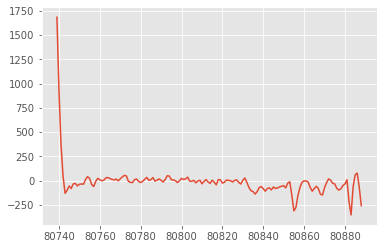

In [7]:
plt.plot(df_extend[df_extend.shot == 21747][cols_control].diff().dropna(axis = 0)['\\RC02'])

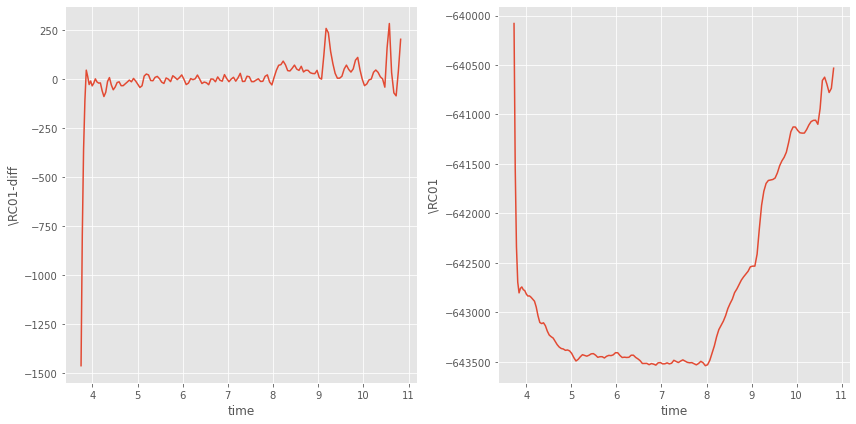

In [13]:
col = '\\RC01'
shot_num = 21747

fig, axes = plt.subplots(1,2, figsize = (12,6))
axes = axes.ravel()

axes[0].plot(df_extend[df_extend.shot == shot_num]['time'].iloc[1:], df_extend[df_extend.shot == shot_num][cols_control].diff().dropna(axis = 0)[col])
axes[1].plot(df_extend[df_extend.shot == shot_num]['time'], df_extend[df_extend.shot == shot_num][cols_control][col])
axes[0].set_xlabel("time")
axes[0].set_ylabel("{}-diff".format(col))
axes[1].set_xlabel("time")
axes[1].set_ylabel(col)

fig.tight_layout()

In [ ]:
# Operation control review